## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# Dataset yang dianalisis merupakan kumpulan unggahan Twitter bertema kesehatan mental.
# Isinya berupa cuitan dari pengguna tentang perasaan, pengalaman emosional, maupun indikasi masalah psikologis.
# Analisis utamanya adalah untuk mengelompokkan teks ke dalam tema/topik tertentu menggunakan teknik Topic Modeling (LDA) agar dapat memahami pola pembahasan yang sering muncul pada isu kesehatan mental di media sosial.

# 2. Penjelasan setiap kolomnya
# Dataset ini umumnya memiliki beberapa kolom utama.
# Pertama, terdapat kolom post_id, yaitu sebuah penanda unik yang diberikan untuk setiap tweet sehingga setiap entri dapat dibedakan satu sama lain.
# Kemudian, kolom terpenting adalah post_text, yaitu isi teks dari cuitan pengguna. Bagian ini menjadi sumber utama dalam proses analisis karena berisi informasi yang akan diolah menggunakan teknik NLP dan Topic Modeling.
# Selanjutnya, terdapat kolom label (jika tersedia), yang berfungsi menunjukkan kategori atau kelas tertentu dari setiap tweet—misalnya label terkait kesehatan mental. Kolom ini tidak selalu ada dan keberadaannya tergantung dataset yang digunakan.
# Ada juga kolom timestamp (opsional), yang berisi waktu ketika cuitan tersebut diposting. Informasi waktu ini dapat digunakan untuk melihat distribusi atau pola data berdasarkan periode tertentu.
# Secara keseluruhan, kolom yang menjadi fokus utama dalam analisis adalah post_text, karena bagian tersebut menyediakan teks mentah untuk dilakukan pemrosesan lebih lanjut.

# 3. Import library
# 4. Load data

In [3]:
# Import library
# Library utama
import pandas as pd
import numpy as np
import re
import nltk

# NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation

# Visualisasi
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


In [ ]:
# 4. Load data
import pandas as pd

df = pd.read_csv("Mental-Health-Twitter.csv")
df.head()



,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

In [ ]:
# 1. Jumlah baris data
len(df)

20000

In [ ]:
# 2. Panjang rata-rata setiap baris
df["text_len"] = df["post_text"].astype(str).apply(len)
df["text_len"].mean()

np.float64(82.46295)

In [ ]:
# 3. Cek data duplikasi
df.duplicated().sum()

np.int64(0)

In [8]:
# 4. Cek data kosong
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
text_len        0
dtype: int64

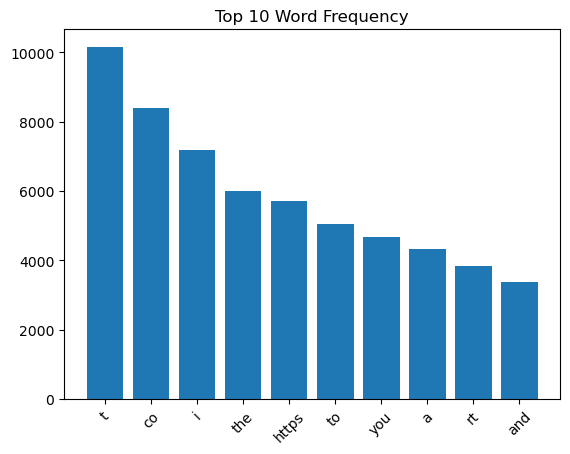

In [10]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Word Frequency")
plt.show()


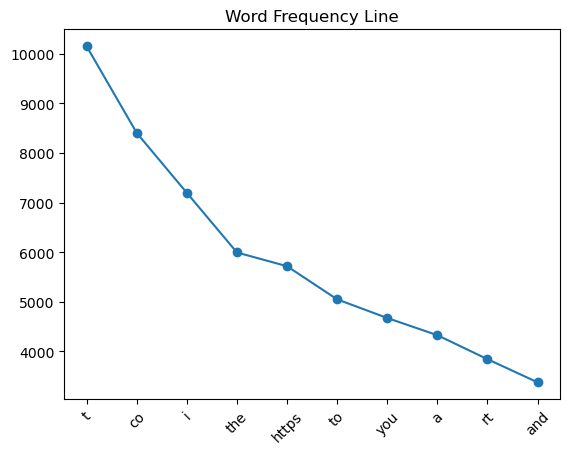

In [14]:
# line chart
plt.plot(words, counts, marker="o")
plt.xticks(rotation=45)
plt.title("Word Frequency Line")
plt.show()


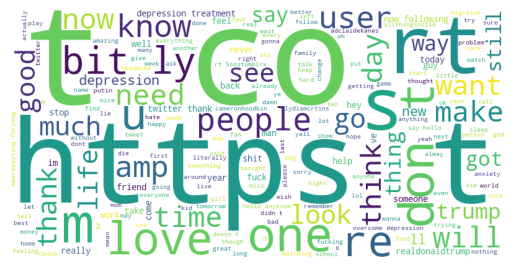

In [15]:
# word cloud
text_joined = " ".join(word_tokens)
wc = WordCloud(width=800, height=400, background_color="white").generate(text_joined)

plt.imshow(wc)
plt.axis("off")
plt.show()


## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Text Vektorisasi

In [16]:
# 1. Tokenisasi
df["tokens"] = df["post_text"].astype(str).apply(
    lambda x: re.findall(r"\b\w+\b", x.lower()))



In [17]:
# 2. Lemmatization
lemmatizer = WordNetLemmatizer()
df["lemma"] = df["tokens"].apply(
    lambda w: [lemmatizer.lemmatize(x) for x in w]
)


In [18]:
# 3. Stemming
stemmer = PorterStemmer()
df["stem"] = df["lemma"].apply(
    lambda w: [stemmer.stem(x) for x in w]
)


In [19]:
# 4. Stopword removal (Tanda baca, angka dan kata)
stop_words = set(stopwords.words("english"))

df["clean_tokens"] = df["stem"].apply(
    lambda w: [x for x in w if x.isalpha() and x not in stop_words]
)


In [20]:
# 5. Text Normalisasi
df["clean_text"] = df["clean_tokens"].apply(lambda x: " ".join(x))

In [21]:
# 6. Matrix correlation (opsional)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["clean_text"])
tfidf_matrix.shape


(20000, 18833)

In [22]:
# 7. Text Vektorisasi
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
X.shape


(20000, 18833)

## Data Modeling

In [23]:
# Model yang digunakan Latent Dirichlet Allocation
# Tujuan: menemukan kategori/topik tersembunyi dalam data teks.
# Model LDA
n_topics = 5
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42
)
lda.fit(X)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


## Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya

In [24]:
# Menampilkan kata–kata penting pada tiap topik
terms = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"Topik {idx+1}:")
    top_terms = topic.argsort()[-10:]
    print([terms[i] for i in top_terms])
    print()


Topik 1:
['azarkansero', 'thefuxedo', 'genevieveverso', 'know', 'would', 'like', 'misslusyd', 'fuck', 'thi', 'rt']

Topik 2:
['thi', 'follow', 'thank', 'say', 'overcom', 'treatment', 'rt', 'depress', 'co', 'http']

Topik 3:
['love', 'wa', 'feel', 'one', 'good', 'time', 'get', 'like', 'thi', 'rt']

Topik 4:
['go', 'hi', 'cut', 'wa', 'need', 'game', 'im', 'mnwild', 'yong', 'rt']

Topik 5:
['migrain', 'follow', 'thank', 'trump', 'rt', 'user', 'ly', 'bit', 'co', 'http']



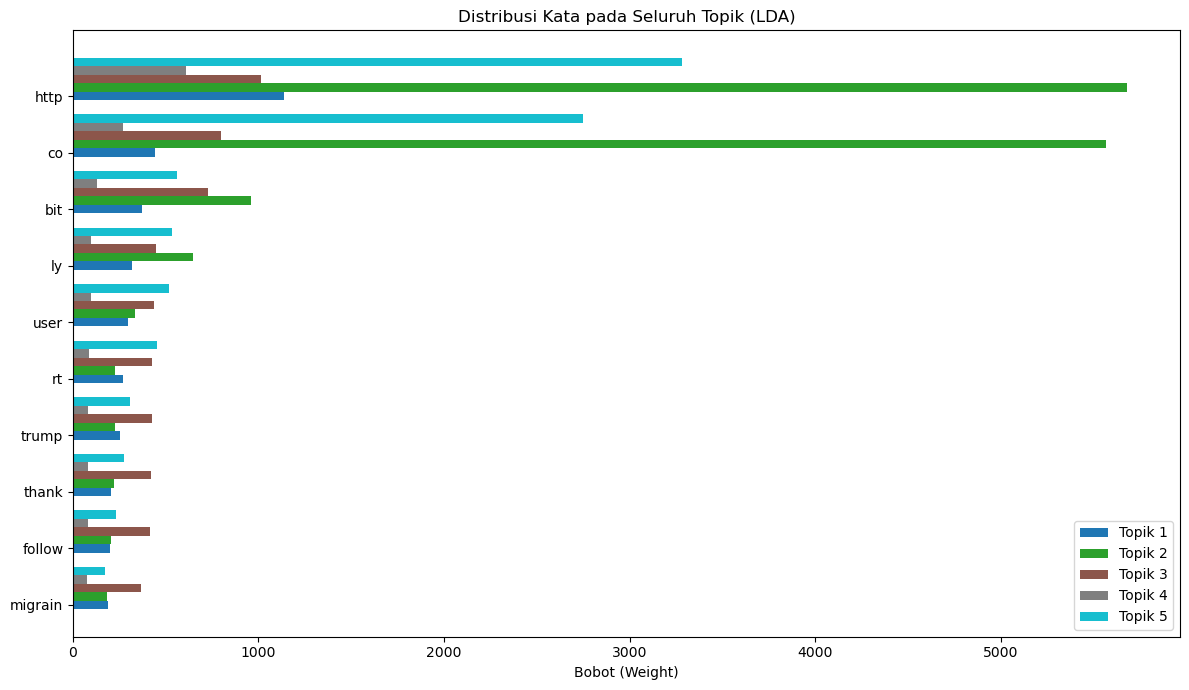

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# jumlah kata teratas per topik
n_top_words = 10
topics = lda.components_

plt.figure(figsize=(12, 7))

# warna beda per topik
colors = plt.cm.tab10(np.linspace(0, 1, len(topics)))

for idx, topic in enumerate(topics):
    top_idx = topic.argsort()[-n_top_words:]
    labels = [terms[i] for i in top_idx]
    weights = topic[top_idx]

    # tambah offset agar tidak menimpa
    y_pos = np.arange(len(labels)) + idx * 0.15

    plt.barh(y_pos, weights, height=0.15, color=colors[idx], label=f"Topik {idx+1}")

# Label & legend
plt.yticks(np.arange(n_top_words), labels)
plt.xlabel("Bobot (Weight)")
plt.title("Distribusi Kata pada Seluruh Topik (LDA)")
plt.legend()
plt.tight_layout()
plt.show()



## Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

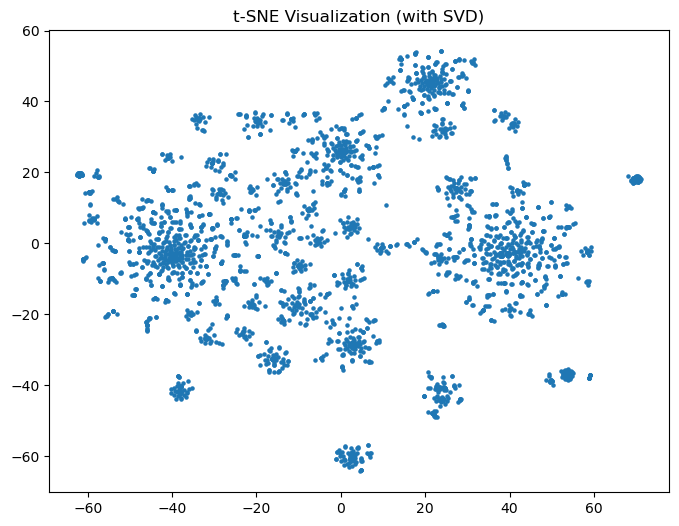

In [29]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sampling data biar lebih ringan
df_sample = df.sample(3000, random_state=42)
X_sample = vectorizer.transform(df_sample["clean_text"])

# Reduce dimension
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X_sample)

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_svd)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=5)
plt.title("t-SNE Visualization (with SVD)")
plt.show()
